# NPK Level Identification (Nitrogen Index)
Nitrogen Nutrition Index is one of the numerous index computed from satellite image using remote sensing techniques. Using the multi-spectral images from the satellite the nitrogen content of the soil can be computed to help in the management of Nitrogen fertilizer applications.

The modified triangle vegetation index 2 (MTVI2) is a good predictor of corn canopy nitrogen content at 60 days after sowing (Nikrooz Bagheri et, 2013). Although other Index can help give a clue on the Nitrogen Nutrition Index, the Chlorophyll content in the leave would give a good impression on the nitrogen content in the soil.

For the purpose of this research two area where selected within **Bangalore-India**. Each area has farms, water bodies and some dense vegetation

### Front end (Interactive web gis)
The client (farmer) get to select the farm land using a satellite image background or an open street map from the front end. Farmer can interact with the UI to draw specifically the size and get shape and orientation of the farm. The farm would then be exported as a geojson file and converted to a shapefile to compute the vegetation indices.

In [ ]:
import folium
from folium import plugins

central_coord = (12.9865,437.5896)
sensemap = folium.Map(location=central_coord,zoom_start =12,tiles= 'Open Street Map',control_scale=True)

folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(sensemap)
folium.raster_layers.TileLayer(tiles= 'Stamen Toner', name = 'Toner').add_to(sensemap)
folium.LayerControl().add_to(sensemap)

measure = plugins.MeasureControl(position='bottomright',active_color='blue',completed_color='red', 
                                         primary_length_unit='meters', primary_area_unit='sqmeters')
sensemap.add_child(measure)
plugins.Draw(export =True,position='bottomright').add_to(sensemap)
sensemap

In [ ]:
%matplotlib inline
from Main import *
from indice_tools import *

plt.rc('font', size=8)
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8)

#filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/144/051/LC08_L1TP_144051_20200315_20200325_01_T1/'
#blueband = 'LC08_L1TP_144051_20200315_20200325_01_T1_B0{}.TIF'.format(2)
#greenband = 'LC08_L1TP_144051_20200315_20200325_01_T1_B0{}.jp2'.format(3)
#redband = 'LC08_L1TP_144051_20200315_20200325_01_T1_B0{}.jp2'.format(4)
#nirband = 'LC08_L1TP_144051_20200315_20200325_01_T1_B0{}.jp2'.format(5)

filepath = '/gis/shared_folder/Abhishek/sentinel-2/S2A_MSIL2A_20200404T052641_N0214_R105_T43REK_20200404T092852.SAFE/GRANULE/L2A_T43REK_A024984_20200404T053351/IMG_DATA/R10m/'
blueband = 'T43REK_20200404T052641_B0{}_10m.jp2'.format(2)
greenband ='T43REK_20200404T052641_B0{}_10m.jp2'.format(3)
redband = 'T43REK_20200404T052641_B0{}_10m.jp2'.format(4)
nirband = 'T43REK_20200404T052641_B0{}_10m.jp2'.format(8)
shapefile ='/gis/shared_folder/kwasi/Nitrogen_Index/shapefile/Polygon_1.shp'

## Crop Specific Farmland
Area one has the farmland with an area of **36.376  hectares**. The area of interest is used to crop the large tile to make the investigation more precise and easily relateable.

In [ ]:
crop_aoi = area_of_interest(shapefile)
blue_aoi = load_band_aoi(filepath,blueband,crop_aoi)
green_aoi = load_band_aoi(filepath,greenband,crop_aoi)
red_aoi = load_band_aoi(filepath,redband,crop_aoi)
nir_aoi = load_band_aoi(filepath,nirband,crop_aoi)

## Visualize the Vegetation Indices of Area of Interest

In [ ]:
plt.figure(figsize=(20,18), dpi=50)
index_plot(nir_aoi,shapefile,'gist_gray','Near Infra Red Band 14-03-2020')

## Visualize the Vegetation Indices and Nitrogen Index

In [ ]:
ndvi_aoi = calc_ndvi(nir_aoi,red_aoi)
ndwi_aoi = calc_ndwi(nir_aoi,green_aoi)
mtvi2_aoi = calc_mtvi2(nir_aoi,red_aoi,green_aoi)
mcari2_aoi = calc_mcari2(nir_aoi,red_aoi,green_aoi)
savi_aoi = calc_savi(nir_aoi,red_aoi,0.5)
osavi_aoi = calc_osavi(nir_aoi,red_aoi)
Nitrogen_ndvi = calc_N_ndvi(ndvi_aoi)
Nitrogen_mtvi2 = calc_N_mtvi2(mtvi2_aoi)
gci_aoi  = calc_gci(nir_aoi,green_aoi)
sipi_aoi = calc_sipi(nir_aoi,red_aoi,blue_aoi)

### Compute the Nitrogen Index.
From the research publication from _"Multispectral remote sensing for site‐specific nitrogen fertilizer management"_ (Nikrooz Bagheri, etal)
Using the following equations the Nitrogen index of the area is computed from MTVI2 and NDVI using regression method adapted in the article.

**N = 26.901(MTVI2)^2  - 30.669(MTVI2) + 10.648** using MTVI2

**N = 38.764 (NDVI)^2  - 24.605(NDVI) + 5.8103** using NDVI

In [ ]:
plt.figure(figsize=(30,24), dpi=150)

plt.subplot(3,4,1)
index_plot(ndvi_aoi,shapefile,'YlGn','Normalized Difference \n Vegetation Index 14-03-2020')

plt.subplot(3,4,2)
index_plot(ndwi_aoi,shapefile,'YlGnBu','Normalized Difference \n Water Index 14-03-2020')

plt.subplot(3,4,3)
index_plot(savi_aoi,shapefile,'copper','Soil Adjusted Vegetation \n Index 14-03-2020')

plt.subplot(3,4,4)
index_plot(mcari2_aoi,shapefile,'Greens','Modified Chlorophyll Absorption \n Ratio Index 2 14-03-2020')

plt.subplot(3,4,5)
index_plot(osavi_aoi,shapefile,'afmhot','Optimized Soil Adjusted \n Vegetation Index 14-03-2020')

plt.subplot(3,4,6)
index_plot(mtvi2_aoi,shapefile,'hot','Modified Triangle Vegetation Index 2 \n 014-03-2020')

plt.subplot(3,4,7)
index_plot(Nitrogen_ndvi,shapefile,'YlOrBr_r','Nitrogen Index  Using NDVI 14-03-2020' )

plt.subplot(3,4,8)
index_plot(Nitrogen_mtvi2,shapefile,'YlOrBr_r','Nitrogen Index Using MTVI2 14-03-2020')

plt.subplot(3,4,9)
index_plot(gci_aoi,shapefile,'YlGn','Green Chlorophyll Index (Crop Health) 14-03-2020' )

plt.subplot(3,4,10)
index_plot(sipi_aoi,shapefile,'BrBG','Structure Insentitive Pigment Index 14-03-2020')

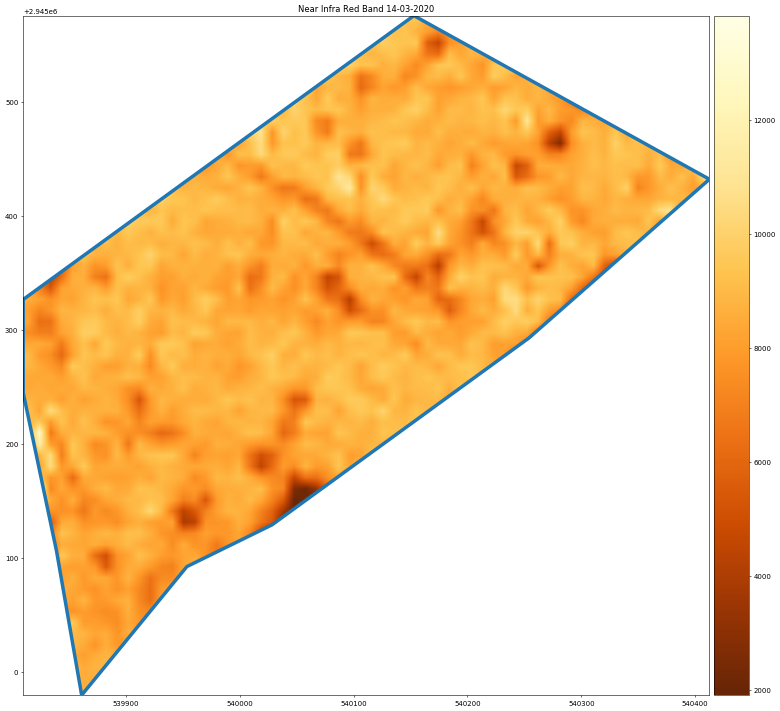

In [1]:
%matplotlib inline
from Main import *
from indice_tools import *

filepath = '/gis/shared_folder/Abhishek/sentinel-2/S2A_MSIL2A_20200404T052641_N0214_R105_T43REK_20200404T092852.SAFE/GRANULE/L2A_T43REK_A024984_20200404T053351/IMG_DATA/R10m/'
band = 'T43REK_20200404T052641_B0{}_10m.jp2'
shapefile ='/gis/shared_folder/kwasi/Nitrogen_Index/shapefile/Polygon_1.shp'

Nitro = compute_nitrogen(filepath,band,shapefile)
plt.figure(figsize=(20,18), dpi=50)
index_plot(Nitro,shapefile,'YlOrBr_r','Near Infra Red Band 14-03-2020')